###  Loading Data from .csv file

In [1]:
import numpy as np

xy=np.loadtxt('data-01-test-score.csv',delimiter=',',dtype=np.float32)
x_data=xy[:,:-1]
y_data=xy[:,-1]

In [2]:
print(x_data.shape) # x_data shape
print(len(x_data))  # x_data 길이
print(x_data[:5])   # 첫 다섯 개

(25, 3)
25
[[ 73.  80.  75.]
 [ 93.  88.  93.]
 [ 89.  91.  90.]
 [ 96.  98. 100.]
 [ 73.  66.  70.]]


In [3]:
print(y_data.shape) # y_data shape
print(len(y_data))  # y_data 길이
print(y_data[:5])   # 첫 다섯 개

(25,)
25
[152. 185. 180. 196. 142.]


In [4]:
import torch
import torch.nn as nn
import torch.nn.functional as F
import torch.optim as optim

In [5]:
# For reproducibility
torch.manual_seed(1)

## Low-level Implementation

In [6]:
# 데이터
x_train = torch.FloatTensor(x_data)
y_train = torch.FloatTensor(y_data)
# 모델 초기화
W = torch.zeros((3, 1), requires_grad=True)
b = torch.zeros(1, requires_grad=True)
# optimizer 설정
optimizer = optim.SGD([W, b], lr=1e-5)

nb_epochs = 20
for epoch in range(nb_epochs + 1):
    
    # H(x) 계산
    hypothesis = x_train.matmul(W) + b # or .mm or @

    # cost 계산
    cost = torch.mean((hypothesis - y_train) ** 2)

    # cost로 H(x) 개선
    optimizer.zero_grad()
    cost.backward()
    optimizer.step()

    # 100번마다 로그 출력
    print('Epoch {:4d}/{} Cost: {:.6f}'.format(
        epoch, nb_epochs, cost.item()
    ))

Epoch    0/20 Cost: 26811.960938
Epoch    1/20 Cost: 10594.790039
Epoch    2/20 Cost: 4598.844727
Epoch    3/20 Cost: 2381.967041
Epoch    4/20 Cost: 1562.316162
Epoch    5/20 Cost: 1259.258545
Epoch    6/20 Cost: 1147.200073
Epoch    7/20 Cost: 1105.759155
Epoch    8/20 Cost: 1090.427490
Epoch    9/20 Cost: 1084.748901
Epoch   10/20 Cost: 1082.639771
Epoch   11/20 Cost: 1081.850220
Epoch   12/20 Cost: 1081.548340
Epoch   13/20 Cost: 1081.427002
Epoch   14/20 Cost: 1081.372437
Epoch   15/20 Cost: 1081.342651
Epoch   16/20 Cost: 1081.321655
Epoch   17/20 Cost: 1081.304199
Epoch   18/20 Cost: 1081.288086
Epoch   19/20 Cost: 1081.272339
Epoch   20/20 Cost: 1081.256592


## High-level Implementation with nn.Module

In [7]:
class MultivariateLinearRegressionModel(nn.Module):
    def __init__(self):
        super().__init__()
        self.linear = nn.Linear(3, 1)

    def forward(self, x):
        return self.linear(x)

In [8]:
# 데이터
x_train = torch.FloatTensor(x_data)
y_train = torch.FloatTensor(y_data)
# 모델 초기화
model = MultivariateLinearRegressionModel()
# optimizer 설정
optimizer = optim.SGD(model.parameters(), lr=1e-5)

nb_epochs = 20
for epoch in range(nb_epochs+1):
    
    # H(x) 계산
    prediction = model(x_train)
    
    # cost 계산
    cost = F.mse_loss(prediction, y_train)
    
    # cost로 H(x) 개선
    optimizer.zero_grad()
    cost.backward()
    optimizer.step()
    
    # 20번마다 로그 출력
    print('Epoch {:4d}/{} Cost: {:.6f}'.format(
        epoch, nb_epochs, cost.item()
    ))

Epoch    0/20 Cost: 28657.203125
Epoch    1/20 Cost: 11280.179688
Epoch    2/20 Cost: 4855.401367
Epoch    3/20 Cost: 2479.970703
Epoch    4/20 Cost: 1601.697388
Epoch    5/20 Cost: 1276.963745
Epoch    6/20 Cost: 1156.889648
Epoch    7/20 Cost: 1112.483643
Epoch    8/20 Cost: 1096.054077
Epoch    9/20 Cost: 1089.968628
Epoch   10/20 Cost: 1087.707275
Epoch   11/20 Cost: 1086.859985
Epoch   12/20 Cost: 1086.535522
Epoch   13/20 Cost: 1086.404297
Epoch   14/20 Cost: 1086.344727
Epoch   15/20 Cost: 1086.311401
Epoch   16/20 Cost: 1086.287842
Epoch   17/20 Cost: 1086.267944
Epoch   18/20 Cost: 1086.249512
Epoch   19/20 Cost: 1086.231445
Epoch   20/20 Cost: 1086.213623


<ipython-input-8-378deb2b54e7>:16: UserWarning: Using a target size (torch.Size([25])) that is different to the input size (torch.Size([25, 1])). This will likely lead to incorrect results due to broadcasting. Please ensure they have the same size.
  cost = F.mse_loss(prediction, y_train)


## PyTorch Dataset
- torch.utils.data.Dataset 상속
---
### Custom DataLoader
우리가 직접 만드는 custom dataloader은 다음과 같은 세 파트로 이루어져 있다.

1. __ init __ (self) : download, read data 등을 하는 파트
2. __ getitem __ (self, index) : 인덱스에 해당하는 아이템을 넘겨주는 파트, 어떠한 인덱스 idx를 받았을 때, 그에 상응하는 입출력 데이터 반환
3. __ len __ (self) : data size를 넘겨주는 파트, 이 dataset의 총 데이터 개수


In [9]:
from torch.utils.data import Dataset

class CustomDataset(Dataset):
    def __init__(self):
        self.x_data=[[73, 80, 75],
                  [93, 88, 93],
                  [89, 91, 90],
                  [96, 98, 100],
                  [73, 66, 70]]
        self.y_data=[[152],[185],[180],[196],[142]]
    
    def __len__(self):
        return len(self.x_data)
    
    def __getitem__(self,idx):
        x=torch.FloatTensor(self.x_data[idx])
        y=torch.FloatTensor(self.y_data[idx])
        
        return x,y
    
dataset=CustomDataset()

## PyTorch DataLoader
- torch.utils.data.DataLoader 사용
- Dataset을 인자로 받아 data를 뽑아냄
- batch_size=2 : 각 minibatch의 크기, 통상적으로 2의 제곱수로 설정
- shuffle=True : Epoch마다 데이터셋을 섞어서, 데이터가 학습되는 순서를 바꾼다. 
---
### Minibtach Gradient Descent
- 엄청난 양의 데이터를 한 번에 학습시킬 수 없다.
- 일부분의 데이터로만 학습하자
- 전체 데이터를 균일하게 나눠서 학습하는 것
- 업데이트를 좀 더 빠르게 할 수 있다.
- 전체 데이터를 쓰지 않아서 잘못된 방향으로 업데이트를 할 수도 있다.

#### epcoh
- 한번 '모든' 트레이닝 데이터에 대해서 forward와 backward pass를 진행한 상태

#### batch_size
- forward와 backward를 한번에 얼만큼의 데이터씩 진행할 것인지 그 사이즈

#### iterations
- batch_size 단위로 몇 번 forward, backward를 진행했는지 그 수

#### data size=batch_size*iterations

In [10]:
from torch.utils.data import DataLoader

dataloader=DataLoader(
    dataset,
    batch_size=2,
    shuffle=True,
)

## Full code with Dataset and DataLoader
- enumerate(dataloader) : minibatch 인덱스와 데이터를 받음
- len(dataloader) : 한 epoch 당 minibatch 개수

In [11]:
nb_epochs=20
for epoch in range(nb_epochs+1):
    for batch_idx, samples in enumerate(dataloader):
        x_train, y_train=samples
        
        #H(x) 계산
        prediction=model(x_train)
        
        # cost 계산
        cost=F.mse_loss(prediction, y_train)
        
        # cost로 H(x) 계산
        optimizer.zero_grad()
        cost.backward()
        optimizer.step()
        
        print('Epoch {:4d}/{} Batch {}/{} Cost: {:6f}'.format(
        epoch, nb_epochs, batch_idx+1, len(dataloader),
        cost.item()
    ))
        

Epoch    0/20 Batch 1/3 Cost: 3.819134
Epoch    0/20 Batch 2/3 Cost: 2.243192
Epoch    0/20 Batch 3/3 Cost: 0.158230
Epoch    1/20 Batch 1/3 Cost: 0.825465
Epoch    1/20 Batch 2/3 Cost: 0.010978
Epoch    1/20 Batch 3/3 Cost: 0.108147
Epoch    2/20 Batch 1/3 Cost: 0.051899
Epoch    2/20 Batch 2/3 Cost: 0.544668
Epoch    2/20 Batch 3/3 Cost: 0.005719
Epoch    3/20 Batch 1/3 Cost: 0.110820
Epoch    3/20 Batch 2/3 Cost: 0.048311
Epoch    3/20 Batch 3/3 Cost: 0.997255
Epoch    4/20 Batch 1/3 Cost: 0.505473
Epoch    4/20 Batch 2/3 Cost: 0.037492
Epoch    4/20 Batch 3/3 Cost: 0.256017
Epoch    5/20 Batch 1/3 Cost: 0.512007
Epoch    5/20 Batch 2/3 Cost: 0.211494
Epoch    5/20 Batch 3/3 Cost: 0.086010
Epoch    6/20 Batch 1/3 Cost: 0.055021
Epoch    6/20 Batch 2/3 Cost: 0.574683
Epoch    6/20 Batch 3/3 Cost: 0.002051
Epoch    7/20 Batch 1/3 Cost: 0.140478
Epoch    7/20 Batch 2/3 Cost: 0.590867
Epoch    7/20 Batch 3/3 Cost: 0.008368
Epoch    8/20 Batch 1/3 Cost: 0.433417
Epoch    8/20 Batch 2/3 C

### PyTorch의 Dataset과 DataLoader 이용
- PyTorch의 Dataset과 DataLoader를 이용하면 학습을 위한 방대한 데이터를 미니배치 단위로 처리할 수 있고, 데이터를 무작위로 섞음으로써 학습의 효율성을 향상시킬 수 있다.
- 데이터를 여러 개의 GPU를 이용해 병렬처리로 학습할 수도 있다.

In [12]:
from sklearn.datasets import load_iris
from torch.utils.data import TensorDataset, DataLoader

iris=load_iris()


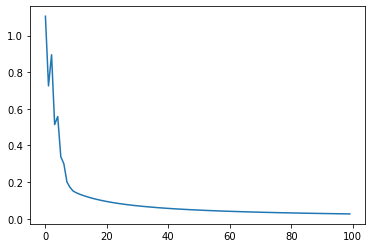

In [13]:
X=iris.data[:100]
y=iris.target[:100]

X = torch.tensor(X, dtype=torch.float32)
y = torch.tensor(y, dtype=torch.float32)

net=nn.Linear(4,1)
loss_fn=nn.BCEWithLogitsLoss()
optimizer=optim.SGD(net.parameters(), lr=0.25)

losses=[]

for epoch in range(100):
    batch_loss=0.0
    
    optimizer.zero_grad()
    y_pred=net(X)
    loss=loss_fn(y_pred.view_as(y),y)
    loss.backward()
    optimizer.step()
    batch_loss+=loss.item()
    
    losses.append(batch_loss)
    
from matplotlib import pyplot as plt
plt.plot(losses)
plt.show()

위의 코드에 대해서 Dataset과 DataLoader를 적용한 코드로, 앞 코드의 하이퍼 파라미터 등에 대한 모든 조건은 통일하고 단지 미니배치를 10으로 하여 학습시키다.

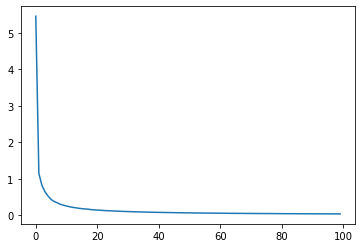

In [14]:
X = iris.data[:100]
y = iris.target[:100]
X = torch.tensor(X, dtype=torch.float32)
y = torch.tensor(y, dtype=torch.float32)
ds = TensorDataset(X, y)
loader = DataLoader(ds, batch_size=10, shuffle=True)
net = nn.Linear(4, 1)
loss_fn = nn.BCEWithLogitsLoss()
optimizer = optim.SGD(net.parameters(), lr=0.25)
losses = []
for epoc in range(100):
    batch_loss = 0.0
    for xx, yy in loader:
        optimizer.zero_grad()
        y_pred = net(xx)
        loss = loss_fn(y_pred.view_as(yy), yy)
        loss.backward()
        optimizer.step()
        batch_loss += loss.item()
    losses.append(batch_loss)
from matplotlib import pyplot as plt
plt.plot(losses)
plt.show()